In [1]:
#Importation des bibliothèques

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

In [3]:
#Chargment des données de passagers / aéroport de 1990 à 2024 et infos générales

In [4]:
data = pd.read_excel("../DATA/ASP_APT_1990-2024-PourML.xlsx")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37841 entries, 0 to 37840
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ANMOIS        37841 non-null  int64 
 1   APT_NOM       37841 non-null  object
 2   APT_ZON       37841 non-null  object
 3   APT_PAX_dep   37841 non-null  int64 
 4   APT_PAX_arr   37841 non-null  int64 
 5   APT_PAX_tr    37841 non-null  int64 
 6   APT_NMVT_mxt  37841 non-null  int64 
 7   TOT_PASS      37841 non-null  int64 
 8   ANNEE         37841 non-null  int64 
 9   MOIS          37841 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 2.9+ MB


In [6]:
#Visualisation d'un échantillon des 5 premières lignes

In [7]:
data.head(10)

,ANMOIS,APT_NOM,APT_ZON,APT_PAX_dep,APT_PAX_arr,APT_PAX_tr,APT_NMVT_mxt,TOT_PASS,ANNEE,MOIS
0,199001,MAYOTTE-MARCEL HENRY,OM,1059,1140,0,85,2199,1990,1
1,199001,LA REUNION-ROLAND GARROS,OM,39164,38059,731,853,77954,1990,1
2,199001,AGEN-LA GARENNE,MT,883,875,27,157,1785,1990,1
3,199001,BORDEAUX-MERIGNAC,MT,95798,91982,13094,2645,200874,1990,1
4,199001,BERGERAC-DORDOGNE-PERIGORD,MT,1228,1150,1577,337,3955,1990,1
5,199001,LA ROCHELLE-ILE DE RE,MT,1279,1322,0,101,2601,1990,1
6,199001,POITIERS-BIARD,MT,953,925,768,264,2646,1990,1
7,199001,LIMOGES-BELLEGARDE,MT,4523,4575,324,323,9422,1990,1
8,199001,TOULOUSE-BLAGNAC,MT,123587,120139,7653,2706,251379,1990,1
9,199001,PAU-PYRENEES,MT,21727,20169,896,681,42792,1990,1


# Affichage des stats descriptives

In [8]:
print('Info statistique des datas')
data.describe().round(0)

Info statistique des datas


,ANMOIS,APT_PAX_dep,APT_PAX_arr,APT_PAX_tr,APT_NMVT_mxt,TOT_PASS,ANNEE,MOIS
count,37841.0,37841.0,37841.0,37841.0,37841.0,37841.0,37841.0,37841.0
mean,200672.0,65513.0,65492.0,1057.0,1550.0,132062.0,2007.0,7.0
std,988.0,263739.0,263554.0,2795.0,4390.0,528125.0,10.0,3.0
min,199001.0,0.0,0.0,0.0,0.0,0.0,1990.0,1.0
25%,199810.0,1405.0,1395.0,0.0,139.0,3020.0,1998.0,4.0
50%,200612.0,5093.0,5049.0,66.0,296.0,10861.0,2006.0,7.0
75%,201506.0,24039.0,23809.0,722.0,1018.0,48094.0,2015.0,9.0
max,202412.0,3941224.0,3875068.0,44002.0,46511.0,7472829.0,2024.0,12.0


# Observation évolution du nombre de passager via une courbe par année

In [9]:
dfStats = data[["ANNEE","TOT_PASS"]].groupby("ANNEE").sum()
dfStats

,TOT_PASS
ANNEE,
1990,88059151
1991,84632303
1992,92030606
1993,94096395
1994,99502360
1995,100728149
1996,108233450
1997,111275497
1998,118410366


In [10]:
dfStats["TOT_PASS"].values

array([ 88059151,  84632303,  92030606,  94096395,  99502360, 100728149,
       108233450, 111275497, 118410366, 127924749, 135607612, 130697829,
       130299337, 128903142, 135049199, 141587363, 148350001, 155743867,
       157738620, 151357825, 153520749, 163429991, 168015376, 171900407,
       175386740, 180883934, 186503675, 197167723, 206523539, 214373061,
        70050537,  90770867, 174011278, 198705966, 205868255])

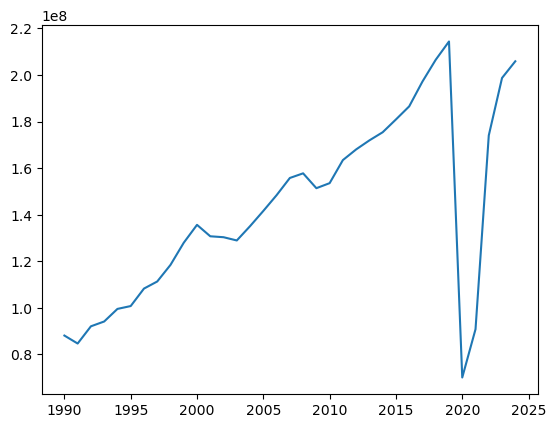

In [11]:
x=dfStats["TOT_PASS"].index
y=dfStats["TOT_PASS"].values
plt.plot(x, y)
plt.show()

# Vérification des valeurs aberrantes avec les graphiques moustaches

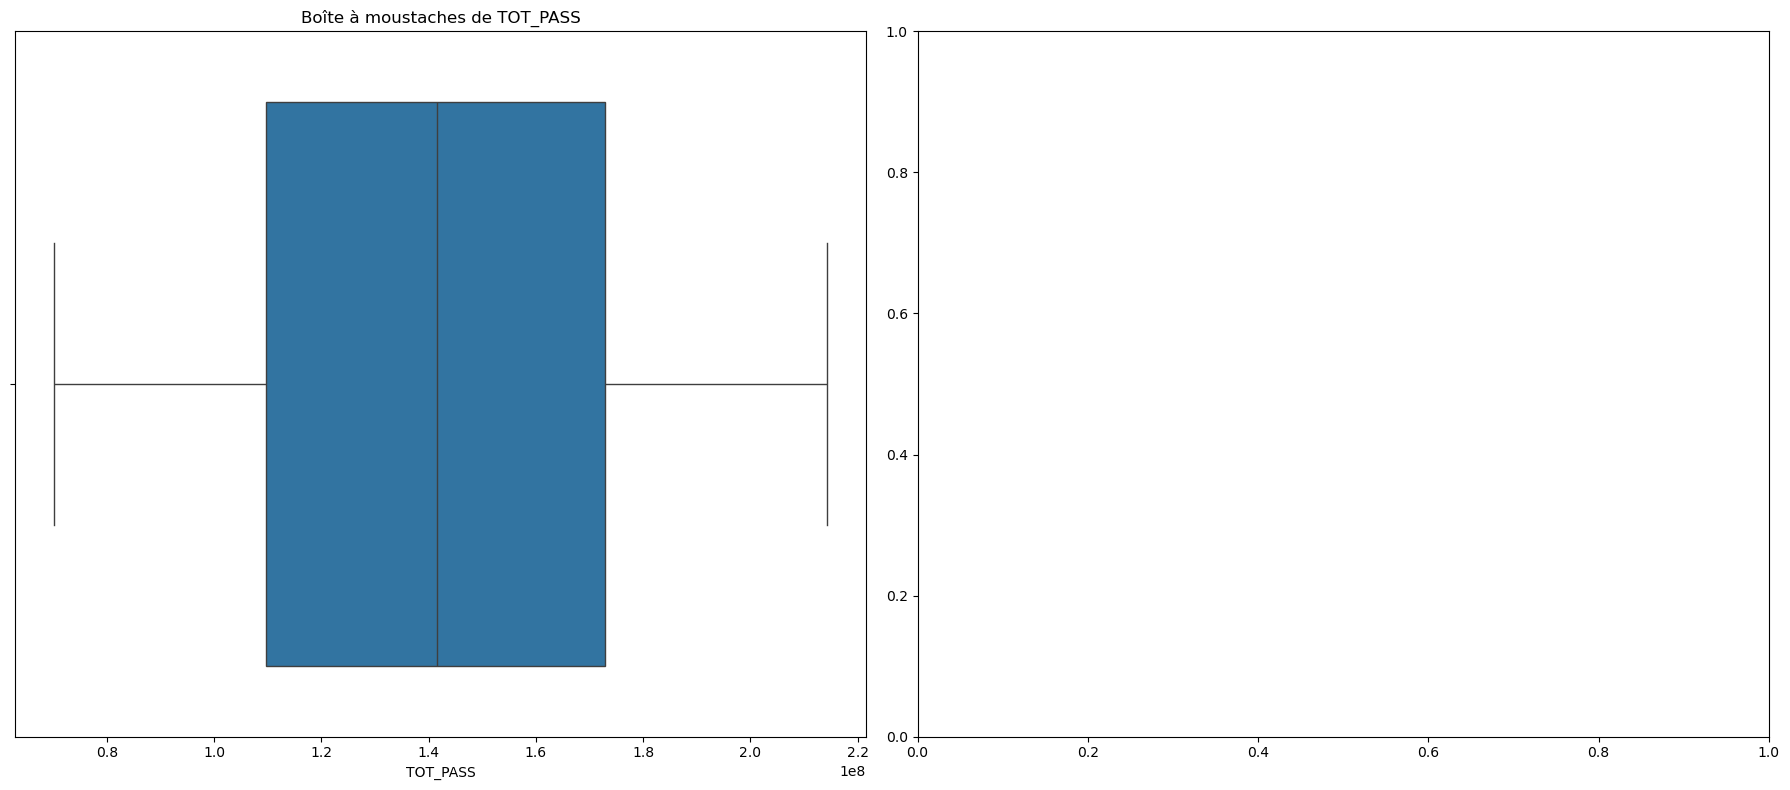

In [12]:
# Crée une figure avec 2 lignes et 3 colonnes
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 2 rangées, 3 colonnes, grande taille pour mieux voir

# Liste des 6 colonnes à tracer (puisque tu sais qu'il y en a 6)
cols = dfStats.select_dtypes(include=['float64', 'int64']).columns

# Boucle sur les colonnes et les axes (axes est un tableau 2D ici)
for ax, col in zip(axes.flatten(), cols):
  sns.boxplot(x=dfStats[col], ax=ax)  # Trace le boxplot dans l'axe correspondant
  ax.set_title(f'Boîte à moustaches de {col}')  # Met un titre avec le nom de la colonne

plt.tight_layout()  # Ajuste bien l'espace entre les graphiques
plt.show()  # Affiche le tout

# Moyenne passagers par mois par aéroport en 2020 : 86057 passagers

In [13]:
data[data["ANNEE"] == 2020]["TOT_PASS"].mean()

np.float64(86057.17076167076)

# Moyenne passagers par mois par aéroport en 2019 : 203583 passagers

In [14]:
data[data["ANNEE"] == 2019]["TOT_PASS"].mean()

np.float64(203583.15384615384)

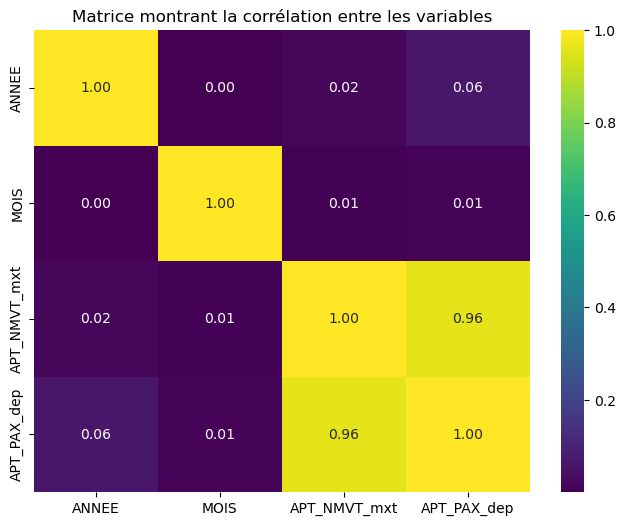

In [15]:
# Calcul de la matrice de corrélation
correlation = data[['ANNEE', 'MOIS', 'APT_NMVT_mxt', 'APT_PAX_dep']].corr()

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matrice montrant la corrélation entre les variables')
plt.show()

In [16]:
data['MOIS'].value_counts()

MOIS
7     3240
6     3211
3     3190
12    3185
10    3167
4     3161
1     3159
8     3151
9     3143
5     3131
2     3053
11    3050
Name: count, dtype: int64

In [17]:
dfStatsMois = data[["MOIS","TOT_PASS"]].groupby("MOIS").sum()

In [18]:
dfStatsMois

,TOT_PASS
MOIS,
1,350933889
2,336899872
3,383265586
4,414495758
5,432083942
6,451483582
7,504417541
8,499936807
9,453959498


In [19]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [20]:
#Rercherche et suppression des aéroports avec moins de 2 lignes (sinon erreur Proophet)
dfStatsNom = data[["APT_NOM","TOT_PASS"]].groupby("APT_NOM").count()
dfStatsNom[dfStatsNom['TOT_PASS'] < 2]


,TOT_PASS
APT_NOM,
LE CASTELLET,1
NENGO,1


In [21]:
#suppression du castellet et de nengo car il n'y a qu'une seule ligne et cela ne fonctionnne pas avec Prophet
print(data[data['APT_NOM'] == "LE CASTELLET"]) #résultat index 18243
data[data['APT_NOM'] == "NENGO"]  #résultat index 10084

       ANMOIS       APT_NOM APT_ZON  APT_PAX_dep  APT_PAX_arr  APT_PAX_tr  \
18243  200605  LE CASTELLET      MT          611          617           0   

       APT_NMVT_mxt  TOT_PASS  ANNEE  MOIS  
18243            59      1228   2006     5  


,ANMOIS,APT_NOM,APT_ZON,APT_PAX_dep,APT_PAX_arr,APT_PAX_tr,APT_NMVT_mxt,TOT_PASS,ANNEE,MOIS
10084,199904,NENGO,OM,663,253,0,44,916,1999,4


In [22]:
data.drop(index=18243, inplace=True)
data.drop(index=10084, inplace=True)

In [23]:
# Après avoir constaté que nous ne pouvions pas appliquer un modèle de régression linéaire car
# il faut s'appuyer sur des valeurs qualitatives, et après avoir étudier les différents modèles
# possibles les plus adaptés à ce type d'étude nous retenons lgbmregressor

In [24]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import openpyxl

# =====================
# 1. Charger les données
# =====================
df = data  # adapte le nom du fichier

# =====================
# 2. Encodage des variables catégorielles
# =====================
le = LabelEncoder()
df["APT_NOM_enc"] = le.fit_transform(df["APT_NOM"])

# =====================
# 3. Ajout de variables utiles
# =====================
# Saison (encodage cyclique des mois)
df["MOIS_sin"] = np.sin(2 * np.pi * df["MOIS"] / 12)
df["MOIS_cos"] = np.cos(2 * np.pi * df["MOIS"] / 12)

# Variables explicatives et cible
features = ["ANNEE", "MOIS", "MOIS_sin", "MOIS_cos", "APT_NOM_enc"]
target = "TOT_PASS"

X = df[features]
y = df[target]

# =====================
# 4. Split train/test
# =====================
train = df[df["ANNEE"] <= 2023]
test = df[df["ANNEE"] == 2024]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# =====================
# 5. Entraînement du modèle
# =====================
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)
#AJout PP
# Calcul de prédiction
Y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 36842, number of used features: 5
[LightGBM] [Info] Start training from score 130054.544270
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 189893	valid_0's l2: 3.60592e+10
[100]	valid_0's rmse: 132024	valid_0's l2: 1.74304e+10
[150]	valid_0's rmse: 108080	valid_0's l2: 1.16812e+10
[200]	valid_0's rmse: 95864	valid_0's l2: 9.18991e+09
[250]	valid_0's rmse: 91969.4	valid_0's l2: 8.45836e+09
[300]	valid_0's rmse: 86205.6	valid_0's l2: 7.4314e+09
[350]	valid_0's rmse: 84232.5	valid_0's l2: 7.09512e+09
[400]	valid_0's rmse: 77423.1	valid_0's l2: 5.99433e+09
[450]	valid_0's rmse: 76663	valid_0's l2: 5.87722e+09
[500]	valid_0's rmse: 75368.2	valid

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# =====================
# 1. Ajouter les prédictions sur le jeu de test (2024)
# =====================
test["TOT_PASS_pred"] = model.predict(X_test)

# =====================
# 2. Calculer les erreurs par aéroport
# =====================
results = (
    test.groupby("APT_NOM")
    .apply(lambda g: pd.Series({
        "MAE": mean_absolute_error(g["TOT_PASS"], g["TOT_PASS_pred"]),
        "RMSE": mean_squared_error(g["TOT_PASS"], g["TOT_PASS_pred"]),
        "MAPE (%)": (np.abs((g["TOT_PASS"] - g["TOT_PASS_pred"]) / g["TOT_PASS"])
                        .replace([np.inf, -np.inf], np.nan)
                        .dropna()
                        .mean() * 100)
    }))
    .reset_index()
)

# =====================
# 3. Exporter les résultats
# =====================
results.to_excel("../DATA/erreurs_par_aeroport.xlsx", index=False)

print("✅ Résultats détaillés enregistrés dans 'erreurs_par_aeroport.xlsx'")
print(results.head(10))  # aperçu des 10 premiers aéroports

C:\Users\pping\AppData\Local\Temp\ipykernel_6900\2163268516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["TOT_PASS_pred"] = model.predict(X_test)
C:\Users\pping\AppData\Local\Temp\ipykernel_6900\2163268516.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


✅ Résultats détaillés enregistrés dans 'erreurs_par_aeroport.xlsx'
                      APT_NOM            MAE          RMSE     MAPE (%)
0             AUTRES APT (MT)    4469.301536  2.662255e+07    80.233134
1             AUTRES APT (OM)    3546.349226  1.586308e+07    26.309320
2                         AHE    8486.024117  7.201261e+07   863.278140
3  AJACCIO-NAPOLEON-BONAPARTE    8017.940587  9.827998e+07     5.726185
4                 ALBERT-BRAY    5133.290220  3.030944e+07  2302.428754
5                      ARUTUA    7147.012084  6.120257e+07   693.347162
6                    AURILLAC    7017.664011  6.369961e+07   328.893422
7               BALE-MULHOUSE   95420.953107  1.084323e+10    12.807998
8              BASTIA-PORETTA   35904.835401  1.531809e+09    30.888132
9              BEAUVAIS-TILLE  107193.914954  1.321999e+10    19.021921


# Analyse du MSE et du R²
R² = Excellent. Cela veut dire que le modèle explique 99,4 % de la variance des données.

MSE = 3,1 milliards → cela sembler énorme à première vue, mais en comparantcomparer au volume des données, plus de 5 Milliards de passagers, cela est correcte.
Le MSE est une erreur au carré. on choisi de faire calculer le RMSE qui représente l'erreur moyenne par prédiction qui elle, est de l’ordre de 56 000 passagers.

Pour les gros aéroports comme CDG ou Orly, qui transportent 10 à 70 millions de passagers/an, une erreur de 56k est très faible (<1%).

Pour les petits aéroports (50 000 – 200 000 passagers/an), une erreur de 56k peut être très élevée proportionnellement.

Le modèle est donc très fiable pour les grands aéroports (où le trafic est massif et stable) mais plus fragile pour les petits aéroports (où la saisonnalité et les fluctuations locales comptent beaucoup).
=> Au regard de la proportion importante que représente le traffic passager des aéroports les plus massifs et après avoir appliqué d'autres modèles (prophet par aéroport et transformation de log), ce modèle semble le plus approprié au regard du faible MAPE sur les aéroports à gros traffic.

In [26]:
# =====================
# 6. Générer les prédictions pour 2025
# =====================
# Créer la grille (tous les aéroports x 12 mois en 2025)
airports = df["APT_NOM"].unique()
months = range(1, 13)
pred_data = []

for apt in airports:
    for mois in months:
        pred_data.append([2025, mois, apt])

pred_df = pd.DataFrame(pred_data, columns=["ANNEE", "MOIS", "APT_NOM"])

# Ajout des features
pred_df["APT_NOM_enc"] = le.transform(pred_df["APT_NOM"])
pred_df["MOIS_sin"] = np.sin(2 * np.pi * pred_df["MOIS"] / 12)
pred_df["MOIS_cos"] = np.cos(2 * np.pi * pred_df["MOIS"] / 12)

# Prédiction
pred_df["TOT_PASS_pred"] = model.predict(pred_df[features])

# =====================
# 7. Export Excel
# =====================
pred_df.to_excel("../DATA/predictions_passagers_2025.xlsx", index=False)

print("✅ TERMINE Fichier 'predictions_passagers_2025.xlsx' généré avec succès !")


✅ TERMINE Fichier 'predictions_passagers_2025.xlsx' généré avec succès !


In [27]:
#Vérification de la cohérence sur CDG
pred_df[pred_df['APT_NOM'] == "PARIS-CHARLES DE GAULLE"]

,ANNEE,MOIS,APT_NOM,APT_NOM_enc,MOIS_sin,MOIS_cos,TOT_PASS_pred
456,2025,1,PARIS-CHARLES DE GAULLE,95,5.000000e-01,8.660254e-01,4.602519e+06
457,2025,2,PARIS-CHARLES DE GAULLE,95,8.660254e-01,5.000000e-01,4.575689e+06
458,2025,3,PARIS-CHARLES DE GAULLE,95,1.000000e+00,6.123234e-17,4.913348e+06
459,2025,4,PARIS-CHARLES DE GAULLE,95,8.660254e-01,-5.000000e-01,5.082705e+06
460,2025,5,PARIS-CHARLES DE GAULLE,95,5.000000e-01,-8.660254e-01,5.418279e+06
461,2025,6,PARIS-CHARLES DE GAULLE,95,1.224647e-16,-1.000000e+00,5.721556e+06
462,2025,7,PARIS-CHARLES DE GAULLE,95,-5.000000e-01,-8.660254e-01,6.483862e+06
463,2025,8,PARIS-CHARLES DE GAULLE,95,-8.660254e-01,-5.000000e-01,6.503120e+06
464,2025,9,PARIS-CHARLES DE GAULLE,95,-1.000000e+00,-1.836970e-16,5.893428e+06
465,2025,10,PARIS-CHARLES DE GAULLE,95,-8.660254e-01,5.000000e-01,5.946019e+06
